# Projeto Final - Parte 1
> Informações gerais sobre o dataset, descrição e classificação das variáveis.

- toc: true 
- badges: true
- comments: false
- image: images/chart-preview.png

##  Informações sobre o Dataset Escolhido

### Origem e contexto

Desde 2009, com a pandemia de Influenza A(H1N1)pdm09, a Secretaria de Vigilância em Saúde (SVS), vinculada ao Ministério da Saúde, desenvolve a vigilância da Síndrome Respiratória Aguda Grave (SRAG) no Brasil. Em 2020 a vigilância da COVID-19 foi incorporada na rede de vigilância da Influenza e outros vírus respiratórios.

Todos os bancos de dados epidemiológicos de SRAG, desde 2009 até os dias atuais (2021), são disponibilizados no portal https://opendatasus.saude.gov.br. 

### Coleta dos dados

Os dados analisados são obtidos a partir do preenchimento de uma "Ficha de Registro Individual" ([link](https://opendatasus.saude.gov.br/dataset/9f76e80f-a2f1-4662-9e37-71084eae23e3/resource/bd725e4c-c869-400f-a479-9b544c2812b4/download/ficha-srag-final-27.07.2020_final.pdf)), cujo preenchimento e envio para o SISTEMA  DE INFORMAÇÃO  DE  VIGILÂNCIA  EPIDEMIOLÓGICA  DA GRIPE (SIVEP Gripe) é mandatório para os casos de SRAG hospitalizados ou os óbitos por SRAG, independente de hospitalização. Portanto, os dados em questão não se referem a amostras dos casos, e sim ao conjunto de todos os casos que os sistema de vigilância consegue captar.

### Periodicidade e Atualizações

Os dados da vigilância de SRAG no Brasil disponibilizados estão sujeitos a alterações decorrentes da investigação pelas equipes de vigilância epidemiológica que desenvolvem o serviço nas três esferas de gestão.

Os dados de são disponibilizados semanalmente, às quartas-feiras, podendo, excepcionalmente, a atualização ocorrer em outro dia.

### Observações, casos, instâncias

Cada linha se refere a um caso relatado por um profissional de saúde, ligado a um paciente. É possível que um mesmo paciente seja acometido pela SRAG mais de uma vez. Portanto, um indivíduo poderia ter mais de uma linha associado a ele. Como não há um identificador único de cada pessoa nos dados disponibilizados pelo opendatasus, não é possível saber quais são os casos reincidentes.

## Objetivos e Metodologia

> Sobre o conceito de "letalidade", ver a [Nota 1](#Notas)

**Que tipo de pesquisa/pergunta você pretende fazer com este dataset?**

    - A letalidade da SRAG é a mesma em todos Estados Brasileiros?
    - Quais fatores sociais impactam mais essa letalidade?
**Que tipo(s) de análise(s) estatística(s) você aplicaria para responder às suas perguntas?**

    Testes de hipóteses para avaliar existem diferenças significativas na letalidade em 
    determinados segmentos.
**Qual seria um título adequado para o seu trabalho?**

    "Letalidade da SRAG no Brasil: análise de diferenças sóciais e regionais"
    
    
### Delimitação dos dados selecionados para o estudo

Para o presente estudo foram considerados os dados disponíveis para o ano de 2020 ([link](https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/SRAG/2020/INFLUD-31-05-2021.csv)) e 2021 ([link](https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/SRAG/2021/INFLUD21-31-05-2021.csv)), sendo que a última atualização de ambos foi realizada no dia 02/jun/2021.

Considerando os dados destas versões, existem 2.119.441 linhas, que se referem a casos de SRAG.

Nos arquivos em csv disponibilizados pelo opendatasus existem 154 colunas, sendo que na primeira atividade desta disciplina, "Atividade 1 - Meu primeiro Dataset" ([link](/usp_eah5002/2021/04/07/Atividade1-Descrevendo-dataset.html)) foi apresentada uma breve descrição de cada uma delas, além de serem classificadas.

Para a atividade final da disciplina foram escolhidas 11 variáveis (colunas), que possuem relação com os objetivos do estudo.

### Dados faltantes (*missing data*)

Existem valores faltantes nas variáveis selecionadas para este estudo, seja por falta de preenchimento ou por não ser aplicável. Na análise individual de cada variável esses valores serão identificados como "nd". Em algumas análises esses casos não serão utilizados, assim como os casos com dados preenchidos com valores que não interessam para análise (ex: "ignorado"). Para cada análise deixaremos claro qual percentual dos casos disponíveis foi utilizado.

In [1]:
#hide
# %run update_srag_database.py

In [12]:
#hide

import sqlite3 as sql
import pandas as pd
from srag_functions import *
import altair as alt

# import dataframe_image as dfi
import seaborn as sns

# import gc   >> gc.collect(), liberar memória

def get_description_df(df_srag,var_dict,**include_dict):
    df = df_srag.describe(**include_dict).T
    df['Descrição'] = df.index
    df = df.replace({'Descrição': var_dict})
    df = df.rename(columns={'count':'Contagem',
                           'unique':'Valores únicos',
                           'top':'Mais frequente',
                           'freq':'Maior frequência'})
    return df


def show_table(df_desc,variables_list=None,start_index=0,rows=None,cols_left=['Descrição'],width=1200):
    
    if rows:
        end_index = start_index + rows
    else:
        end_index = len(variables_list)
        
    if variables_list:
        if type(variables_list) is dict:
            cols = list(variables_list.keys())
        elif type(variables_list) is list:
            cols = variables_list
        
        cols= cols[start_index:end_index]
        
        df = df_desc.loc[cols].reset_index()
    else:
        df = df_desc.reset_index()
    
    
    df.index = range(start_index + 1,end_index + 1)
    df = df.rename(columns={'index':'Variável'})    
        
    hover_color="#00BBBB"
    styles = [ 
        dict(selector="tr:hover", props=[("background-color", f"{hover_color}")]),
        dict(selector="th", props=[("font-size", "110%"),("text-align", "center")]),
        dict(selector="td", props=[("text-align", "center")])
#         dict(selector=f"tbody .col{index}", props=[("text-align", "left"),('padding-left', '20px')])
    ]
    if cols_left:
        for col in cols_left:
            index = df.columns.get_loc(col)
            if index >= 0:
                styles.append(dict(selector=f"tbody .col{index}", props=[("width", "600px"),("text-align", "left"),('padding-left', '20px')]))
        
        
    df_styled = df.style.set_table_styles(styles)
#     dfi.export(df_styled, 'table.png',max_rows=200)
#     image = Image(filename='table.png',width=width) 
    return df_styled

In [4]:
#hide
db_name = 'srag'
db_path = f'data/opendatasus/{db_name}.db'
conn = sql.connect(db_path)

selected_cols = ['CLASSI_FIN','CS_ESCOL_N','CS_RACA','CS_SEXO'] #CLASSI_OUT
selected_cols += ['DT_SIN_PRI','DT_NASC']
selected_cols += ['EVOLUCAO','FATOR_RISC','SG_UF_INTE']
selected_cols += ['UTI','SUPORT_VEN'] #'DT_ENTUTI','DT_SAIDUTI']
# selected_cols += ['SEM_PRI','dv_SEM_PRI_ABS',]
selected_cols += ['dv_idade_anos'] # ano, faixa_etaria

columns = ','.join(selected_cols)
df_srag = pd.read_sql(f'SELECT {columns} FROM {db_name} WHERE ano >= 2020', conn)

In [6]:
#hide

print('> Dimensões:\n')
print(f'\t{df_srag.shape[0]} linhas\n\t{df_srag.shape[1]} colunas')
print('\n> Colunas:',df_srag.columns.to_list())
# for col,col_type in df_srag.dtypes.sort_index().items():
#     print('\t{:<15}\t{:<}'.format(col,str(col_type)))

> Dimensões:

	2119441 linhas
	12 colunas

> Colunas: ['CLASSI_FIN', 'CS_ESCOL_N', 'CS_RACA', 'CS_SEXO', 'DT_SIN_PRI', 'DT_NASC', 'EVOLUCAO', 'FATOR_RISC', 'SG_UF_INTE', 'UTI', 'SUPORT_VEN', 'dv_idade_anos']


In [7]:
#hide

cat_nom = {
    'AMOSTRA': 'Foi realizado coleta de amostra para realização de teste diagnóstico?',
    'ANTIVIRAL': 'Fez uso de antiviral para tratamento da doença?',
    'AN_ADENO': 'Resultado do Teste Antigênico. Adenovírus.',
    'AN_OUTRO': 'Resultado do Teste Antigênico. Outro vírus respiratório.',
    'AN_PARA1': 'Resultado do Teste Antigênico. Para influenza 1.',
    'AN_PARA2': 'Resultado do Teste Antigênico. Para influenza 2.',
    'AN_PARA3': 'Resultado do Teste Antigênico. Para influenza 3.',
    'AN_SARS2': 'Resultado do Teste Antigênico. Para SARS-CoV-2.',
    'AN_VSR': 'Resultado do Teste Antigênico, para VSR.',
    'ASMA': 'Paciente possui Asma?',
    'AVE_SUINO': 'Caso com contato direto com aves ou suínos.',
    'CARDIOPATI': 'Paciente possui Doença Cardiovascular Crônica?',
    'CLASSI_FIN': 'Classificação final do caso (diagnóstico).',
    'CLASSI_OUT': 'Descrição de qual outro agente etiológico foi identificado (caso 3-SRAG por outra  causa).',
    'CO_MUN_NOT': 'Código do Município onde está localizada a Unidade Sentinela que realizou a notificação (conforme tabela IBGE).',
    'CO_MUN_RES': 'Código do Município de residência do paciente (conforme tabela IBGE).',
    'CO_MU_INTE': 'Código do Município onde está localizada a Unidade de Saúde onde o paciente internou (conforme tabela IBGE).',
    'CO_PAIS': 'Código do país de residência do paciente.',
    'CO_PS_VGM': 'Código do País de procedência do paciente.',
    'CO_REGIONA': 'Código da Regional de Saúde onde está localizado o Município que realizou a notificação (conforme tabela IBGE).',
    'CO_RG_INTE': 'Código da Reg onal de Saúde onde está localizado o Município de internação do paciente (conforme tabela IBGE).',
    'CO_RG_RESI': 'Código da Regional de Saúde onde está localizado o Município de residência do paciente (conforme tabela IBGE).',
    'CO_UNI_NOT': 'Código CNES da Unidade Sentinela que realizou o atendimento, coleta de amostra e registro do caso.',
    'CRITERIO': 'Indicar qual o critério de confirmação.',
    'CS_ETINIA': 'Nome e código da etnia do paciente, quando indígena.',
    'CS_RACA': 'Cor ou raça declarada pelo paciente.',
    'CS_SEXO': 'Sexo do paciente.',
    'CS_ZONA': 'Zona geográfica do endereço de residência do paciente.',
    'DESC_RESP': 'Paciente apresentou desconforto respiratório?',
    'DIABETES': 'Paciente possui Diabetes mellitus?',
    'DIARREIA': 'Paciente apresentou diarreia?',
    'DISPNEIA': 'Paciente apresentou dispneia?',
    'DOR_ABD': 'Paciente apresentou dor abdominal?',
    'DS_AN_OUT': 'Nome do outro vírus respiratório identificado pelo Teste Antigênico.',
    'DS_PCR_OUT': 'Nome do outro vírus respiratório identificado pelo RT-PCR.',
    'EVOLUCAO': 'Evolução do caso (desfecho).',
    'FADIGA': 'Paciente apresentou fadiga?',
    'FATOR_RISC': 'Paciente apresenta algum fator de risco?',
    'FEBRE': 'Paciente apresentou febre?',
    'FLUASU_OUT': 'Outro subtipo para Influenza A.',
    'FLUBLI_OUT': 'Outra linhagem para Influenza B.',
    'GARGANTA': 'Paciente apresentou dor de gargante?',
    'HEMATOLOGI': 'Paciente possui Doença Hematológica Crônica?',
    'HEPATICA': 'Paciente possui Doença Hepática Crônica?',
    'HISTO_VGM': 'Paciente tem histórico de viagem internacional até 14 dias antes do início dos sintomas?',
    'HOSPITAL': 'O paciente foi internado?',
    'ID_MN_INTE': 'ID do Município onde está localizado a Unidade de Saúde onde o paciente internou (conforme tabela IBGE).',
    'ID_MN_RESI': 'ID do Município de residência do paciente (conforme tabela IBGE).',
    'ID_MUNICIP': 'ID do Município onde está localizada a Unidade Sentinela que realizou a notificação (conforme tabela IBGE).',
    'ID_PAIS': 'País de residência do paciente.',
    'ID_REGIONA': 'ID da Regional de Saúde onde está localizado o Município que realizou a notificação (conforme tabela IBGE).',
    'ID_RG_INTE': 'ID da Re gi onal de Saúde onde  está l oca lizado o Muni cípio de i nte rnação do pa ci ente (conforme tabela IBGE).',
    'ID_RG_RESI': 'ID da Regional de Saúde onde está localizado o Município de residência do paciente (conforme tabela IBGE).',
    'ID_UNIDADE': 'Unidade Sentinela que realizou o atendimento, coleta de amostra e registro do caso.',
    'IMUNODEPRE': 'Paciente possui Imunodeficiência ou Imunodepressão (diminuição da função do sistema imunológico)?',
    'LO_PS_VGM': 'Local (cidade, estado, província e outros) onde foi rea lizada a viagem',
    'MAE_VAC': 'Se paciente < 6 meses, a mãe recebeu vacina?',
    'MORB_DESC': 'Listar outro(s) fator(es) de risco do paciente.',
    'M_AMAMENTA': 'Se paciente < 6 meses, a mãe amamenta a criança?',
    'NEUROLOGIC': 'Paciente possui Doença Neurológica?',
    'NOSOCOMIAL': 'Trata-se decaso nosocomial (infecção adquirida  no hospital)?',
    'OBESIDADE': 'Paciente possui obesidade?',
    'OUTRO_DES': 'Sinais e Sintomas/Outros (Descrição).',
    'OUTRO_SIN': 'Paciente apresentou outro(s) sintoma(s)?',
    'OUT_AMOST': 'Descrição do tipo da amostra clínica, caso diferente das listadas nas categorias do campo.',
    'OUT_ANIM': 'Animal que o paciente teve contato (se selecionado a  AVE_SUINO = 3-outros).',
    'OUT_ANTIV': 'Se o antiviral utilizado não foi Oseltamivir ou Zanamivir, informar qual antiviral foi utilizado.',
    'OUT_MORBI': 'Paciente possui outro(s) fator(es) de risco?',
    'OUT_SOR': 'Descrição do tipo de Sorologia para  SARS-Cov-2.',
    'PAC_COCBO': 'Código da ocupação da Classificação Brasileira de Ocupações(CBO).',
    'PAC_DSCBO': 'Descrição da ocupação da Classificação Brasileira de Ocupações(CBO).',
    'PAIS_VGM': 'Nome do País de procedência do paciente.',
    'PCR_ADENO': 'Resultado diagnóstico do RT-PCR para Adenovírus.',
    'PCR_BOCA': 'Resultado diagnóstico do RT-PCR para Bocavírus.',
    'PCR_FLUASU': 'Subtipo para Influenza A.',
    'PCR_FLUBLI': 'Linhagem para Influenza B.',
    'PCR_METAP': 'Resultado diagnóstico do RT-PCR para Metapneumovírus.',
    'PCR_OUTRO': 'Resultado diagnóstico do RT-PCR para Outro vírus respiratório.',
    'PCR_PARA1': 'Resultado diagnóstico do RT-PCR para influenza 1.',
    'PCR_PARA2': 'Resultado diagnóstico do RT-PCR para influenza 2.',
    'PCR_PARA3': 'Resultado diagnóstico do RT-PCR para influenza 3.',
    'PCR_PARA4': 'Resultado diagnóstico do RT-PCR para influenza 4.',
    'PCR_RESUL': 'Resultado do teste de RT-PCR/outro método por Biologia Molecular.',
    'PCR_RINO': 'Resultado diagnóstico do RT-PCR para Rinovírus.',
    'PCR_SARS2': 'Resultado diagnóstico do RT-PCR para SARS-CoV-2.',
    'PCR_VSR': 'Resultado diagnóstico do RT-PCR para VSR.',
    'PERD_OLFT': 'Paciente apresentou perda do olfato?',
    'PERD_PALA': 'Paciente apresentou perda do paladar?',
    'PNEUMOPATI': 'Paciente possui outra pneumopatia crônica?',
    'POS_AN_FLU': 'Agente etiológico – Teste Antigênico. Positivo para Influenza?',
    'POS_AN_OUT': 'Agente etiológico – Teste Antigênico. Positivo para outros  vírus?',
    'POS_PCRFLU': 'Resultado da RT-PCR foi positivo para Influenza?',
    'POS_PCROUT': 'Resultado da RT-PCR foi positivo para outro vírus respiratório?',
    'PUERPERA': 'Paciente é puérpera ou parturiente (mulher que pariu recentemente–até 45dias do parto)?',
    'RAIOX_OUT': 'Resultado do RX de tórax se selecionada a opção 5-Outro.',
    'RAIOX_RES': 'Resultado de Raio X de Tórax.',
    'RENAL': 'Paciente possui Doença Renal Crônica?',
    'RES_AN': 'Resultado do Teste Antigênico.',
    'RES_IGA': 'Resultado da Sorologia para SARS-CoV-2 (IgA).',
    'RES_IGG': 'Resultado da Sorologia para SARS-CoV-2 (IgG).',
    'RES_IGM': 'Resultado da Sorologia para SARS-CoV-2 (IgM).',
    'SATURACAO': 'Paciente apresentou saturação O2<95%?',
    'SG_UF': 'Unidade Federativa de residência do paciente (conforme tabela IBGE).',
    'SG_UF_INTE': 'Unidade Federativa de internação do paciente (conforme tabela IBGE).',
    'SG_UF_NOT': 'Unidade Federativa onde está localizada a Unidade Sentinela que  realizou a  notificação (conforme tabela IBGE).',
    'SIND_DOWN': 'Paciente possui Síndrome de Down?',
    'SOR_OUT': 'Tipo de Amostra Sorológicapara SARS-Cov-2/Outra, qual?',
    'SUPORT_VEN': 'O paciente fez uso de suporte ventilatório?',
    'SURTO_SG': 'Caso é proveniente de surto de SG?',
    'TOMO_OUT': 'Aspecto tomografia/Outro (especificar).',
    'TOMO_RES': 'Aspecto tomografia.',
    'TOSSE': 'Paciente apresentou tosse?',
    'TP_AMOSTRA': 'Tipo da amostra clínica coletada para o teste diagnóstico.',
    'TP_AM_SOR': 'Tipo de amostra sorológicapara SARS-Cov-2.',
    'TP_ANTIVIR': 'Qual antiviral utilizado?',
    'TP_FLU_AN': 'Resultado do Teste Antigênico, para o tipo de Influenza.',
    'TP_FLU_PCR': 'Resultado diagnóstico do RT-PCR para o tipo de Influenza.',
    'TP_SOR': 'Tipo de Sorologia para  SARS-Cov-2.',
    'TP_TES_AN': 'Tipo do teste antigênico que foi realizado.',
    'UTI': 'O paciente foi internado em UTI ?',
    'VACINA': 'Recebeu vacina contra Gripe na última campanha?',
    'VOMITO': 'Paciente apresentou vômito?'
}

cat_ord = {
    'CS_ESCOL_N': 'Nível de escolaridade do paciente.',
    'CS_GESTANT': 'Idade gestacional da paciente.',
    'COD_IDADE': 'Código referente à idade salva no sistema (TP_IDADE & NU_IDADE_N)',
    'TP_IDADE': 'Tipo/Idade (1-Dia, 2-Mês, 3-Ano)',
    'NU_IDADE_N': 'Idade informada pelo paciente quando não se sabe a data de nascimento.',
}
    
num_disc = {
    'SEM_NOT': 'Semana epidemiológica do preenchimento daficha de notificação.',
    'SEM_PRI': 'Semana epidemiológica dos primeiros sintomas.',
}

num_cont = {
    'OBES_IMC': 'Valor do IMC (Índice de Massa Corporal) do paciente calculado pelo profissional de saúde.',
}

dates_var = {
    'DT_1_DOSE': 'Se >= 6 meses e <= 8 anos, data da 1ª dose para crianças vacinadas pela primeira vez.',
    'DT_2_DOSE': 'Se >= 6 meses e <= 8 anos, data da 2ª dose para crianças vacinadas pela primeira vez.',
    'DT_ANTIVIR': 'Data em que foi iniciado o tratamento com o antiviral.',
    'DT_COLETA': 'Data da coleta da amostra para realização do teste diagnóstico.',
    'DT_CO_SOR': 'Data da coleta do material para diagnóstico por Sorologia.',
    'DT_DIGITA': 'Data de inclusão do registro no sistema.',
    'DT_DOSEUNI': 'Se >= 6 meses e <= 8 anos, data da dose única para crianças vacinadas em campanhas de anos anteriores.',
    'DT_ENCERRA': 'Data do encerramento do caso.',
    'DT_ENTUTI': 'Data de entrada do paciente na Unidade de Terapia Intensiva (UTI).',
    'DT_EVOLUCA': 'Data da alta ou óbito.',
    'DT_INTERNA': 'Data em que o paciente foi hospitalizado.',
    'DT_NASC': 'Data de nascimento do paciente.',
    'DT_NOTIFIC': 'Data de preenchimento da ficha de notificação.',
    'DT_PCR': 'Data do resultado RT-PCR/outro método por Biologia Molecular.',
    'DT_RAIOX': 'Se realizou RX de Tórax, especificar a data do exame.',
    'DT_RES': 'Data do resultado do teste sorológico.',
    'DT_RES_AN': 'Data  do resultado do teste antigênico.',
    'DT_RT_VGM': 'Data  em que retornou de viagem.',
    'DT_SAIDUTI': 'Data  em que o paciente saiu da Unidade de Terapia Intensiva (UTI).',
    'DT_SIN_PRI': 'Data de primeiros sintomas.',
    'DT_TOMO': 'Data da tomografia.',
    'DT_UT_DOSE': 'Data da última dose de vacina contra gripe que o paciente tomou.',
    'DT_VAC_MAE': 'Se a mãe recebeu vacina, qual a data?',
    'DT_VGM': 'Data em que foi realizada a viagem.',
}

In [9]:
df_srag['dv_idade_anos'] = df_srag['dv_idade_anos'].astype(int)

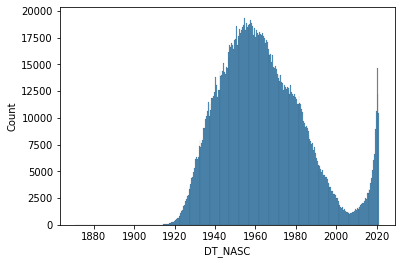

In [13]:
df_srag

col = 'DT_NASC'
x = pd.to_datetime(df_srag[col], errors='coerce',dayfirst=True)
ax = sns.histplot(data=x,discrete=False)

In [10]:
#hide

df_srag['dv_idade_anos'] = df_srag['dv_idade_anos'].astype(int)

var_dict = {**cat_nom, **cat_ord, **num_disc, **num_cont, **dates_var}
include_dict = {'include':['O']}
df_desc = get_description_df(df_srag,var_dict,**include_dict)
df_desc

,Contagem,Valores únicos,Mais frequente,Maior frequência,Descrição
CLASSI_FIN,2119441,6,COVID-19,1348273,Classificação final do caso (diagnóstico).
CS_ESCOL_N,2119441,8,nd,689606,Nível de escolaridade do paciente.
CS_RACA,2119441,7,branca,840424,Cor ou raça declarada pelo paciente.
CS_SEXO,2119441,3,M,1149912,Sexo do paciente.
DT_SIN_PRI,2119441,520,2021-03-01 00:00:00,15219,Data de primeiros sintomas.
DT_NASC,2116425,38358,1950-01-01 00:00:00,199,Data de nascimento do paciente.
EVOLUCAO,2119441,5,cura,1111083,Evolução do caso (desfecho).
FATOR_RISC,2119441,2,sim,1279122,Paciente apresenta algum fator de risco?
SG_UF_INTE,2119441,28,SP,628469,Unidade Federativa de internação do paciente (...
UTI,2119441,4,nao,1163902,O paciente foi internado em UTI ?


## Descrição das Variáveis

    Variáveis
        Identifique-as e classifique-as.

[link para dicionário de dados](https://opendatasus.saude.gov.br/dataset/9f76e80f-a2f1-4662-9e37-71084eae23e3/resource/b3321e55-24e9-49ab-8651-29cf5c8f3179/download/dicionario-de-dados-srag-hospitalizado-27.07.2020-final.pdf)



## Estatística Descritiva
     
    Estatística descritiva
        Apresente todas as variáveis individualmente e cruzando-as entre si, quando necessário. Exemplo: se você for apresentar a variável peso e a sua amostra contiver homens e mulheres, vale separar a variável entre homens e mulheres.
        Utilize medidas-resumo e tabelas de distribuição de frequências e gráficos 
        Utilize números de casas decimais adequados





In [ ]:
#hide 

col = df_srag_selected.columns[0]
var_dict[col]
# df_srag_selected.describe(include=['O'])
include_dict = {'include':['O']}

In [ ]:
#hide

print(df_srag_selected.columns)
i = 0
i_col = 8
col = df_srag_selected.columns.tolist()[i_col]
# col = 'CS_ESCOL_N'
print('\n  coluna:',col)
# df_srag_selected[col].value_counts()#[i:i+20] #/ df_srag_selected.shape[0])


In [ ]:
#hide

df_srag_selected.describe(include='all')

In [ ]:
#hide

# df_srag_selected.CLASSI_FIN.value_counts()

total_cases = df_srag_selected.shape[0]

def get_frequency(df_in,i_col):
    col = df_in.columns.tolist()[i_col]
    
    df = pd.DataFrame()
    df['Frequência'] = df_in[col].value_counts()
    
    return df.reset_index().rename(columns={'index':col})

def get_chart_bar(df):
    
    col = df.columns[0]

    bars = alt.Chart(df).mark_bar().encode(
        y=f'Frequência:Q',
        x=alt.X(f'{col}:N')#,sort='-y'),
    ).properties(
        width=600,
        height=300
    )

#     text = bars.mark_text(
#         align='center',
#         baseline='bottom',
#         dy=0  # Nudges text to right so it doesn't appear on top of the bar
#     ).encode(
#         text=alt.Text("Frequência:Q", format=",.2%")
#     )
    
    chart = (bars)# + text)

    return chart#.properties(height=900)


def get_proportion_cases(df,index_cols,categories_cols):
    df_categories = pd.DataFrame(df.groupby(by=index_cols + categories_cols).size(),columns=['casos']).reset_index()
    df_categories = df_categories.pivot(index=index_cols,columns=categories_cols,values='casos')
    
#     return df_categories
    
    # ex: se index_cols = ['ano','SEM_PRI'], cada linha terá total por ano e semana
    df_subtotal = pd.DataFrame(df.groupby(by=index_cols).size(),columns=['total'])
    
    # ex: calcula proporção de cada categoria na "semana", entre 0.0 e 1.0
    df_rel = df_categories.div(df_subtotal.values,axis=0)
    
    # a princípio considera apenas a primeira categoria
    selected_category = categories_cols[0]
    
    df1 = pd.melt(df_rel,ignore_index=False,value_name='proporção').set_index(selected_category,append=True)
    df2 = pd.melt(df_categories,ignore_index=False,value_name='casos').set_index(selected_category,append=True)

    return pd.concat([df1,df2],axis=1).reset_index()

In [ ]:
#hide

i_col = 1
df = get_frequency(df_srag_selected,i_col)

In [ ]:
#hide

df.style

In [ ]:
#hide

# df2 = df / total_cases
get_chart_bar(df)

In [ ]:
# hide

# df_chart.style.apply(highlight_max,subset=['casos','proporção']).format({'casos':'{:.0f}','proporção':'{:.2%}'})

# df_srag_selected.SG_UF_INTE.unique() # query('SG_UF_INTE == "nd"')
# df_srag_selected.query('EVOLUCAO in ("cura","obito")')
# df_categories.query('EVOLUCAO == "obito"').sort_values(by='proporção').style

In [ ]:
#hide

df = df_srag_selected.query('EVOLUCAO in ("cura","obito")')
index_cols = ['SG_UF_INTE']#,'FATOR_RISC']
categories_cols = ['EVOLUCAO']



df_categories = get_proportion_cases(df,index_cols,categories_cols)


# pd.DataFrame(df.groupby(by=index_cols + categories_cols).size(),columns=['casos']).reset_index()
df_categories.shape

In [ ]:
#hide

# start_index = 0
# rows = 20
# show_table(df_desc,cat_nom,start_index,rows)

In [ ]:
#hide

# start_index += rows
# rows = 50
# show_table(df_desc,cat_nom,start_index,rows)

In [ ]:
#hide

# start_index += rows
# show_table(df_desc,cat_nom,start_index,rows=None)

In [ ]:
#hide

# start_index = 0
# rows = 40
# show_table(df,list(df.index),start_index,rows)

In [ ]:
#hide

# start_index += rows
# rows = 60
# show_table(df,list(df.index),start_index,rows)

In [ ]:
#hide

# start_index += rows
# show_table(df,list(df.index),start_index)

In [ ]:
#hide

# df_head = df_srag.head(1000)
# fname = 'victormarchesini_dataset1_amostra.csv'
# df_head.to_csv(fname,index=False)

## Notas

1. Dentro da epidemiologia, o conceito de letalidade refere-se à razão entre o número de óbitos por determinada doença pelo número de casos da mesma doença. Portanto, é uma medida da gravidade da doença ([Conceitos da Epidemiologia - UFSC](https://unasus2.moodle.ufsc.br/pluginfile.php/33454/mod_resource/content/1/un1/top5_3.html)). É importante ressaltar que essa medida é diferente da mortalidade, que é a razão entre o número de óbitos e a população em risco, e que vai depender tanto da letalidade quanto da incidência da doença na população.